<a href="https://colab.research.google.com/github/Vardhanksai/DAUP-LAB-B37-/blob/main/2203A52152_DAUP_LAB_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import zipfile
import os

zip_path = "/content/archive (7).zip"

extract_dir = "/content/Bank_Customer_Attrition_Insights"

os.makedirs(extract_dir, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Dataset extracted to: {extract_dir}")


Dataset extracted to: /content/Bank_Customer_Attrition_Insights


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("/content/Bank_Customer_Attrition_Insights/Bank-Customer-Attrition-Insights-Data.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15598695,Fields,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15649354,Johnston,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15737556,Vasilyev,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15671610,Hooper,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15625092,Colombo,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

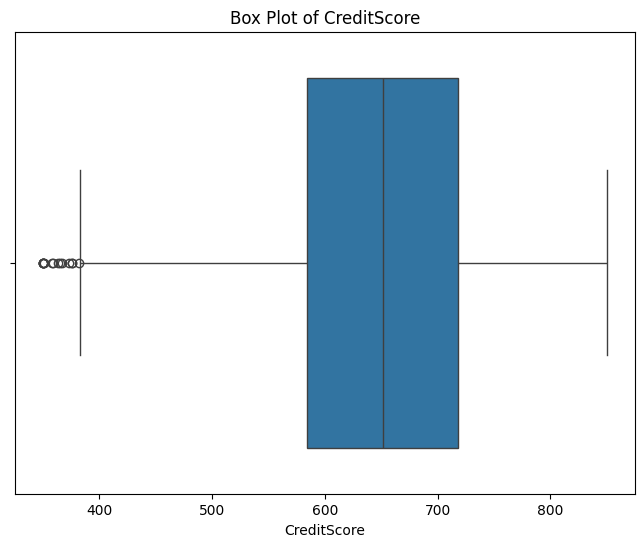

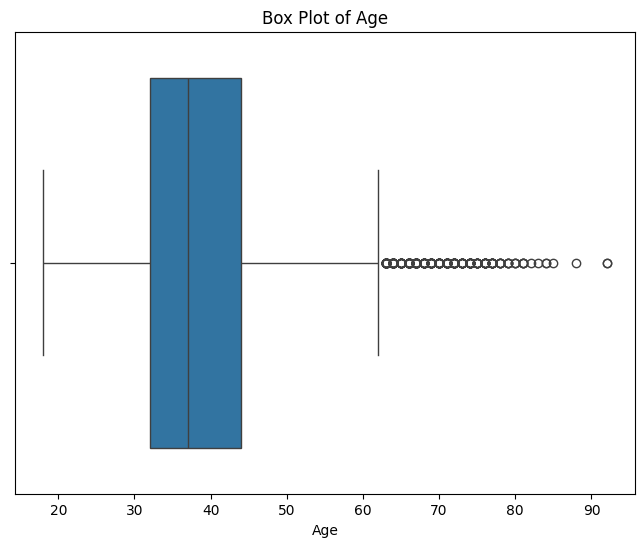

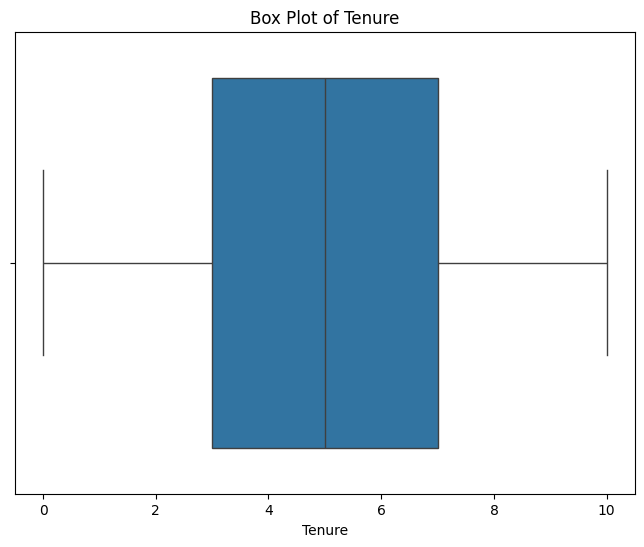

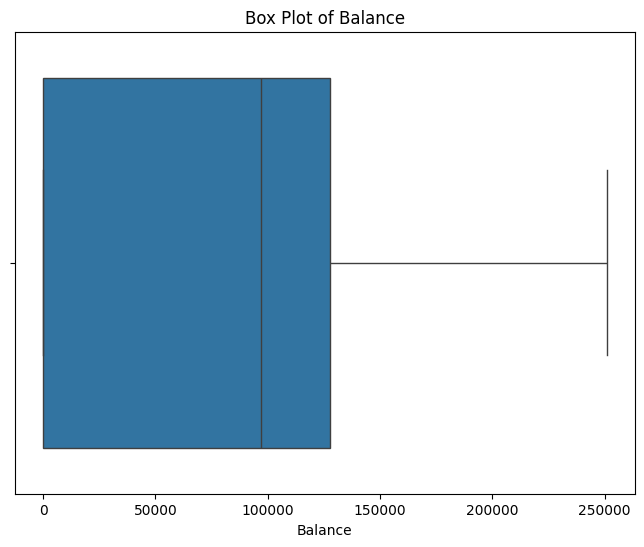

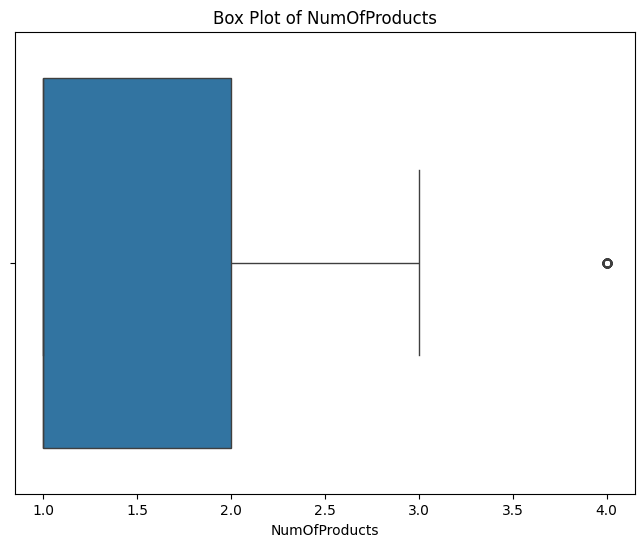

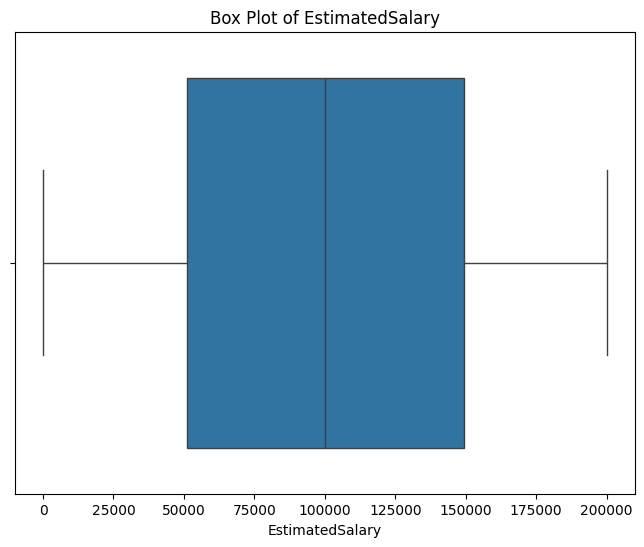

In [10]:
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [12]:


X_with_outliers = df.drop('Exited', axis=1)
y_with_outliers = df['Exited']
X_with_outliers = pd.get_dummies(X_with_outliers, drop_first=True)
X_train_with_outliers, X_test_with_outliers, y_train_with_outliers, y_test_with_outliers = train_test_split(
    X_with_outliers, y_with_outliers, test_size=0.2, random_state=42
)
scaler_with_outliers = StandardScaler()
X_train_with_outliers = scaler_with_outliers.fit_transform(X_train_with_outliers)
X_test_with_outliers = scaler_with_outliers.transform(X_test_with_outliers)


In [13]:

numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']


In [14]:

for feature in numerical_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

X_no_outliers = df.drop('Exited', axis=1)
y_no_outliers = df['Exited']
X_no_outliers = pd.get_dummies(X_no_outliers, drop_first=True)
X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(
    X_no_outliers, y_no_outliers, test_size=0.2, random_state=42
)
scaler_no_outliers = StandardScaler()
X_train_no_outliers = scaler_no_outliers.fit_transform(X_train_no_outliers)
X_test_no_outliers = scaler_no_outliers.transform(X_test_no_outliers)



In [15]:

def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    return accuracy

svm_model = SVC(kernel='rbf')
rf_model = RandomForestClassifier(n_estimators=100)

svm_accuracy_with_outliers = train_and_evaluate(svm_model, X_train_with_outliers, X_test_with_outliers, y_train_with_outliers, y_test_with_outliers)
svm_accuracy_no_outliers = train_and_evaluate(svm_model, X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers)

rf_accuracy_with_outliers = train_and_evaluate(rf_model, X_train_with_outliers, X_test_with_outliers, y_train_with_outliers, y_test_with_outliers)
rf_accuracy_no_outliers = train_and_evaluate(rf_model, X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers)


In [16]:

print("SVM Accuracy with Outliers:", svm_accuracy_with_outliers)
print("SVM Accuracy without Outliers:", svm_accuracy_no_outliers)

print("Random Forest Accuracy with Outliers:", rf_accuracy_with_outliers)
print("Random Forest Accuracy without Outliers:", rf_accuracy_no_outliers)

SVM Accuracy with Outliers: 0.942
SVM Accuracy without Outliers: 0.9388714733542319
Random Forest Accuracy with Outliers: 0.999
Random Forest Accuracy without Outliers: 0.9989550679205852
